# What test to use?

This notebook has the answers to a few different questions using different tests, which will be both parametric & non-parametric.

The data we'll be using comes from the European Social Survey

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data file
df = pd.read_csv("data/ESSdata.csv")

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

We have 6 countries in our sample. This is useful info for later on

### Q1: Did people become less trusting from 2012 to 2014?

Let's calculate for each country

#### Spain (ES)

In [5]:
# check the dist of values for spain for the two years
spain_trust_2012 = df[(df.year == 6) & (df.cntry == "ES")]["ppltrst"]
spain_trust_2014 = df[(df.year == 7) & (df.cntry == "ES")]["ppltrst"]

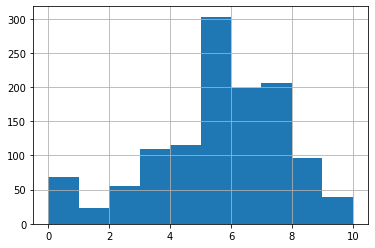

In [6]:
spain_trust_2012.hist()

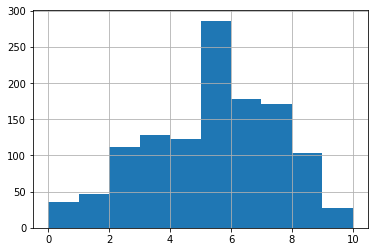

In [7]:
spain_trust_2014.hist()

$H_0: \mu_{2014} = \mu_{2012} $

$H_{a}: \mu_{2014} < \mu_{2012} $

$\alpha = 0.05$

In [8]:
statistic, p_value = stats.wilcoxon(spain_trust_2012, spain_trust_2014)

/Users/ryan/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/ryan/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [9]:
statistic

243475.5

In [10]:
p_value

0.005570829650439684

Reject $H_{0}$ as $p > 0.05$. $p = 0.58$

A little code to prove or disprove our theory

In [11]:
for country in set(df.cntry):
    trust_2012 = df[(df.year == 6) & (df.cntry == country)]["ppltrst"]
    trust_2014 = df[(df.year == 7) & (df.cntry == country)]["ppltrst"]
    
    statistic, p_value = stats.wilcoxon(trust_2012, trust_2014)
    
    print("Country: {}".format(country))
    print("Statistic: {}".format(statistic))
    print("P-Value: {}".format(p_value))
    if p_value >= 0.05:
        print("Result: {}".format("fail to reject null hypothesis"))
    else:
        print("Result: {}".format("reject null hypothesis. 2014 is less trust worthy than 2012"))
    print("-------------\n")

Country: CZ
Statistic: 82837.0
P-Value: 0.2931891426327379
Result: fail to reject null hypothesis
-------------

Country: SE
Statistic: 130719.5
P-Value: 0.028545290985536906
Result: reject null hypothesis. 2014 is less trust worthy than 2012
-------------

Country: DE
Statistic: 44.0
P-Value: 0.9157134600899863
Result: fail to reject null hypothesis
-------------

Country: ES
Statistic: 243475.5
P-Value: 0.005570829650439684
Result: reject null hypothesis. 2014 is less trust worthy than 2012
-------------

Country: CH
Statistic: 106278.5
P-Value: 0.4411286510952477
Result: fail to reject null hypothesis
-------------

Country: NO
Statistic: 85392.0
P-Value: 0.6139175669970661
Result: fail to reject null hypothesis
-------------



/Users/ryan/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/ryan/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


For this I used the Wilcoxon non-parametric test to test the two dependent distributions. I used a non-parametric test because the QQ plot for the overall trust scores did not align with a normal distribution.

In [12]:
se_2012 = df[(df.year == 6) & (df.cntry == "SE")]["ppltrst"]
se_2014 = df[(df.year == 7) & (df.cntry == "SE")]["ppltrst"]

### Q2: Did people become happier from 2012 to 2014

$H_{0}: \mu_{2012} = \mu_{2014}$

$H_{a}: \mu_{2012} < \mu_{2014}$

$\alpha = 0.05$

In [17]:
# analyze the distribution of happiness to see if we need a non-parametric test
happiness_2012 = df[df.year == 6]["happy"]
happiness_2014 = df[df.year == 7]["happy"]

7.723573433115061
8.0


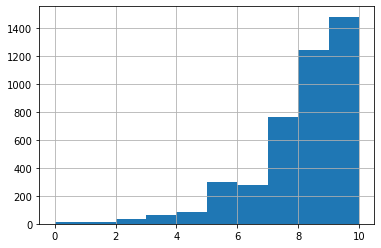

In [20]:
happiness_2012.hist()
print(happiness_2012.mean())
print(happiness_2012.median())

7.665733613249358
8.0


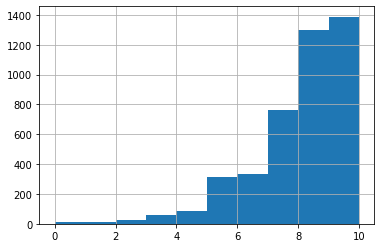

In [21]:
happiness_2014.hist()
print(happiness_2014.mean())
print(happiness_2014.median())

In [24]:
for country in set(df.cntry):
    happy_2012 = df[(df.year == 6) & (df.cntry == country)]["happy"]
    happy_2014 = df[(df.year == 7) & (df.cntry == country)]["happy"]
    
    statistic, p_value = stats.wilcoxon(happy_2012, happy_2014)
    
    print("Country: {}".format(country))
    print("Statistic: {}".format(statistic))
    print("P-Value: {}".format(p_value))
    if p_value >= 0.05:
        print("Result: {}".format("fail to reject null hypothesis"))
    else:
        print("Result: {}".format("reject null hypothesis: 2014 is more happy than 2012"))
    print("-------------\n")

Country: CZ
Statistic: 73213.0
P-Value: 0.01064243454053068
Result: reject null hypothesis: 2014 is more happy than 2012
-------------

Country: SE
Statistic: 125481.0
P-Value: 0.5136403441005022
Result: fail to reject null hypothesis
-------------

Country: DE
Statistic: 23.5
P-Value: 0.393351316918508
Result: fail to reject null hypothesis
-------------

Country: ES
Statistic: 231958.5
P-Value: 0.04923868084306013
Result: reject null hypothesis: 2014 is more happy than 2012
-------------

Country: CH
Statistic: 92816.5
P-Value: 0.8208688161425343
Result: fail to reject null hypothesis
-------------

Country: NO
Statistic: 67571.5
P-Value: 2.7264367804254175e-06
Result: reject null hypothesis: 2014 is more happy than 2012
-------------



/Users/ryan/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/ryan/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [25]:
norway_happy_2012 = df[(df.year == 6) & (df.cntry == "NO")]["happy"]
norway_happy_2014 = df[(df.year == 7) & (df.cntry == "NO")]["happy"]

### Q3: Who reported watching more TV in 2012, men or women?

In [34]:
tv_men_2012 = df[(df.year == 6) & (df.gndr == 1)]["tvtot"]
tv_women_2012 = df[(df.year == 6) & (df.gndr == 2)]["tvtot"]

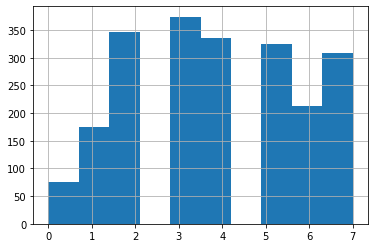

In [35]:
tv_men_2012.hist()

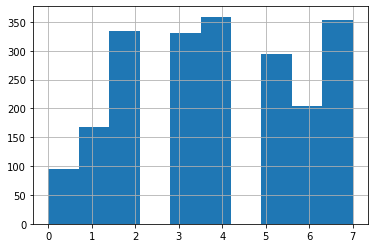

In [36]:
tv_women_2012.hist()

In [55]:
tv_women_2012 = tv_women_2012.dropna()

In [56]:
tv_men_2012 = tv_men_2012.dropna()

In [59]:
stats.kruskal(tv_men_2012, tv_women_2012)

KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)

### Q4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [61]:
fair_with_partner = df[(df.partner == 1) & (df.year == 6)]["pplfair"]
fair_no_partner = df[(df.partner == 2) & (df.year == 6)]["pplfair"]

In [64]:
fair_with_partner = fair_with_partner.dropna()

In [65]:
fair_no_partner = fair_no_partner.dropna()

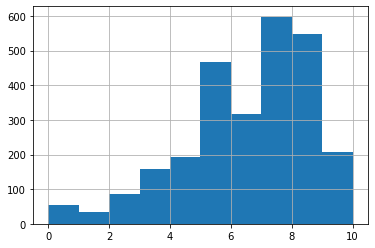

In [66]:
fair_with_partner.hist()

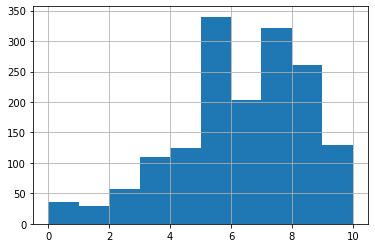

In [67]:
fair_no_partner.hist()

In [75]:
fair_with_partner.median()

7.0

In [76]:
fair_no_partner.median()

6.0

$H_{0}: \mu_{partner} \leq \mu_{single}$

$H_{a}: \mu_{partner} > \mu_{single}$

$\alpha = 0.05$

In [78]:
len(fair_with_partner)

2663

In [81]:
len(fair_no_partner)

1608

In [82]:
statistic, p_value = stats.mannwhitneyu(fair_with_partner, fair_no_partner)

In [83]:
statistic

1998233.5

In [84]:
p_value

0.00010499272215466025

$ p < \alpha $. Reject null. Partnered people think others are more fair

### Q5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

For this we'll use the following countries:

1. Norway (NO)
2. Sweden (SE)
3. Switzerland (CH)
4. Spain (ES)

Since this is a non-parametric distribution, we'll use a modified version of the One-Way ANOVA: The Kruskal-Wallace H test

Our hypotheses are as follows:

$H_{0}: \mu_{country_{i}} = \mu_{all} $

$H_{a}: \mu_{country_{i}} \neq \mu_{all}$

$ \alpha = 0.05 $

In [107]:
country_social_meet_groups = {}
for country in ["NO", "SE", "CH", "ES"]:
    country_social_meet_2014 = df[(df.year == 7) & (df.cntry == country)]["sclmeet"]
    country_social_meet_groups[country] = country_social_meet_2014.dropna()

In [108]:
stats.kruskal(
    country_social_meet_groups["NO"],
    country_social_meet_groups["SE"],
    country_social_meet_groups["CH"],
    country_social_meet_groups["ES"]
)

KruskalResult(statistic=21.186241353532942, pvalue=9.630426325908598e-05)

$ p < \alpha $: reject null hypothesis